<a href="https://colab.research.google.com/github/DevatrishaP/RNAPolII/blob/main/Sliding_window_frequency_of_residue_enrichment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
    import google.colab
    # Running on Google Colab, so install Biopython first
    !pip install biopython
except ImportError:
    pass

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 64.6 MB/s eta 0:00:00


###Import libraries

In [2]:
import os
import sys
import pandas

from urllib.request import urlretrieve

import Bio
from Bio import SeqIO, SearchIO, Entrez
from Bio.Seq import Seq
from Bio.SeqUtils import GC
from Bio.Blast import NCBIWWW
from Bio.Data import CodonTable

print("Python version:", sys.version_info)
print("Biopython version:", Bio.__version__)

Python version: sys.version_info(major=3, minor=9, micro=16, releaselevel='final', serial=0)
Biopython version: 1.81


###To find the frequency of any residue in a moving window of 'n' length
Input - 

*   Fasta file
*   amino acid (letter)
*   window length





Output - 


*   Filename
*   amino acid
*   window length
*   length of the sequence
*   list of frequency of residue
*   plot of the frequency







Fasta file : /content/Plasmodium falciparum.fasta
Motif/Sequence to search for: S
Window length: 300
range(0, 2157) [0.06333333333333334, 0.06333333333333334, 0.06333333333333334, 0.06333333333333334, 0.06333333333333334, 0.06333333333333334, 0.06333333333333334, 0.06333333333333334, 0.06333333333333334, 0.06333333333333334, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06333333333333334, 0.06333333333333334, 0.06333333333333334, 0.06333333333333334, 0.06333333333333334, 0.06333333333333334, 0.06333333333333334, 0.06333333333333334, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06333333333333334, 0.06333333333333334, 0.06333333333333334, 0.06333333333333334, 0.06333333333333334, 0.06333333333333334, 0.06333333333333334, 0.06333333333333334, 0.06333333333333334, 0.06333333333333334, 0.06333333333333334, 0.06333333333333334, 0.06333333333333334, 0.06333333333333334, 0.06333333

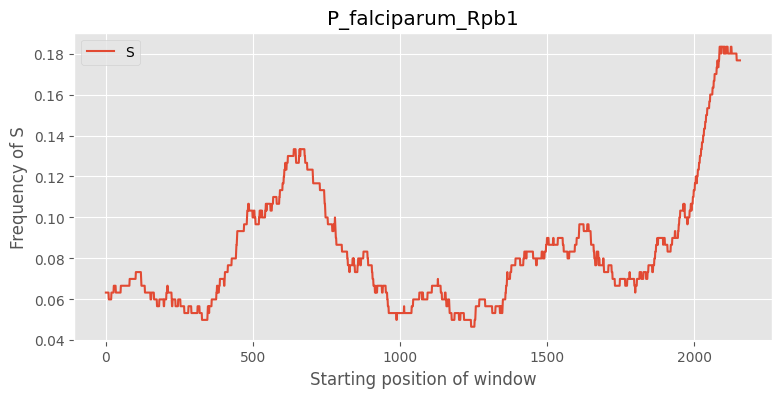

In [11]:
import matplotlib.pyplot as plt

from Bio import SeqIO

def main():
    in_file = input("Fasta file : ")
    fasta_seqs = SeqIO.parse(open(in_file), "fasta")  ## reading fasta file
    motif = str(input("Amino acid to search for: ")).upper()
    J = int(input("Window length: "))
    for fasta in fasta_seqs:
        name, seq = fasta.id, str(fasta.seq)
    return motif,name,seq,J
        
motif,name,seq,J = main()

def freq(seq, motif, J, n):
    seq_part=seq[n:n+J]
    freq = seq_part.count(motif)/J
    return freq

x=len(seq)
freq_arr=[]
for n in range(x-J):
  freq_arr.append(freq(seq, motif, J, n))

print(range(x-J), freq_arr)
plt.style.use("ggplot")
plt.figure(figsize=(9,4))
plt.plot(range(x-J), freq_arr)
plt.xlabel("Starting position of window")
plt.ylabel("Frequency of "+ motif)
plt.legend(motif)
plt.title(name)
plt.show()

#main()


###For Serine, Tyrosine and Tryptophan frequency plot

Fasta file : /content/homo sapiens_protein.txt
Window length: 300
range(0, 1670) [0.043333333333333335, 0.043333333333333335, 0.043333333333333335, 0.043333333333333335, 0.043333333333333335, 0.043333333333333335, 0.043333333333333335, 0.043333333333333335, 0.04, 0.04, 0.04, 0.03666666666666667, 0.03666666666666667, 0.03666666666666667, 0.03666666666666667, 0.03666666666666667, 0.03666666666666667, 0.03666666666666667, 0.03666666666666667, 0.03666666666666667, 0.03666666666666667, 0.03666666666666667, 0.03666666666666667, 0.03666666666666667, 0.03666666666666667, 0.03666666666666667, 0.03666666666666667, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03666666666666667, 0.03666666666666667, 0.03666666666666667, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03666666666666667, 0.03666666666666667, 0.03666666666666667, 0.03666666666666667, 0.03666666666666667, 0.03666666666666667, 0.03666666666666667, 0.03666666

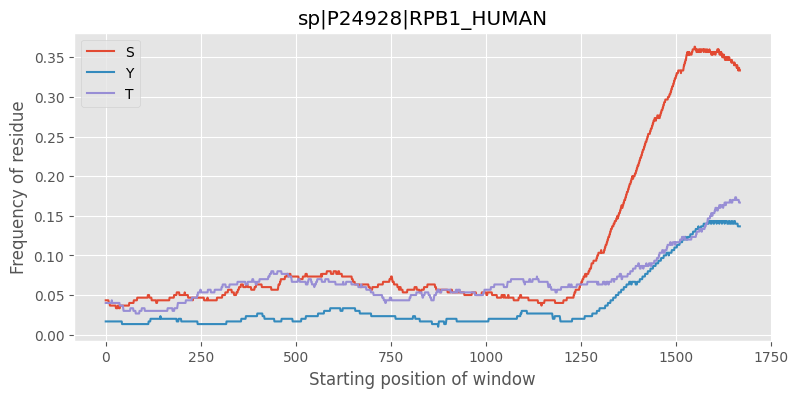

In [33]:
#The skeleton of the code
#Run only to check it
import matplotlib.pyplot as plt

from Bio import SeqIO

def main():
    in_file = input("Fasta file : ")
    fasta_seqs = SeqIO.parse(open(in_file), "fasta")  ## reading fasta file
    motif1 = "S"
    motif2 = "Y"
    motif3 = "T"
    #motif1 = str(input("Motif/Sequence to search for: ")).upper()
    #motif2 = str(input("Motif/Sequence to search for: ")).upper()
    #motif3 = str(input("Motif/Sequence to search for: ")).upper()
    J = int(input("Window length: "))
    for fasta in fasta_seqs:
        name, seq = fasta.id, str(fasta.seq)
    return motif1,motif2,motif3,name,seq,J
        
motif1,motif2,motif3,name,seq,J = main()

def freq1(seq, motif1, J, n):
    seq_part=seq[n:n+J]
    freq1 = seq_part.count(motif1)/J
    return freq1
def freq2(seq, motif2, J, n):
    seq_part=seq[n:n+J]
    freq2 = seq_part.count(motif2)/J
    return freq2
def freq3(seq, motif3, J, n):
    seq_part=seq[n:n+J]
    freq3 = seq_part.count(motif3)/J
    return freq3

x=len(seq)
freq_arr1=[]
for n in range(x-J):
  freq_arr1.append(freq1(seq, motif1, J, n))
freq_arr2=[]
for n in range(x-J):
  freq_arr2.append(freq2(seq, motif2, J, n))
freq_arr3=[]
for n in range(x-J):
  freq_arr3.append(freq3(seq, motif3, J, n))
  

print(range(x-J), freq_arr1, freq_arr2, freq_arr3)

plt.style.use("ggplot")
plt.figure(figsize=(9,4))

plt.plot(range(x-J), freq_arr1, label="S")
plt.plot(range(x-J), freq_arr2, label="Y")
plt.plot(range(x-J), freq_arr3, label="T")

plt.xlabel("Starting position of window")
plt.ylabel("Frequency of residue")
plt.title(name)

plt.legend()
plt.show()

#main()
